## Telco Customer Churn

## By: ALDRINO Hakim Muhtar

## Business Problem Understanding

**Context**  
Saat ini industri telekomunikasi seluler telah berkembang pesat, sehingga persaingan antar provider (perusahaan operator telekomunikasi seluler) menjadi semakin ketat. Salah satu tantangan yang kini dihadapi provider adalah usaha menurunkan jumlah pelanggan yang berhenti menggunakan layanan perusahaan dan beralih langganan ke perusahaan kompetitor.

Suatu provider ingin mengetahui pelanggan yang bagaimana yang akan pindah (churn) dari provider tersebut sehingga jumlah pelanggan yang beralih (churn) dapat dikurangi. Seorang Data Scientist diminta untuk membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak dengan menggunakan machine learning.


Target :

1 : yang akan Churn

0 : Tetap di Telco

**Problem Statement :**

Tingginya persentase customer churn menjadi salah satu indikator tingkat kegagalan suatu perusahaan telekomunikasi, maka perlu dilakukan upaya-upaya untuk mengurangi persentase customer churn tersebut. Perusahaan umumnya lebih memilih untuk mempertahankan pelanggan, karena dibutuhkan biaya yang lebih sedikit untuk mempertahankan pelanggan {customer retention cost) daripada menambah pelanggan yang baru (customer acquisition cost). Berdasarkan informasi dari internet, memperoleh pelanggan baru dapat menghabiskan biaya lima kali lebih banyak daripada mempertahankan pelanggan yang sudah ada. Adapun rata-rata biaya customer acquisition cost untuk industri telekomunikasi adalah sekitar $315 per new customer.

Perusahaan telekomunikasi dapat memberikan insentif retensi seperti memberikan potongan harga, memberikan paket layanan yang menarik, memberikan prioritas pelayanan dan lain-lain dalam upaya untuk mempertahankan pelanggan. Namun, kebijakan pemberian insentif retensi belum sepenuhnya dilakukan secara efektif. Karena jika insentif retensi tersebut diberikan secara merata kepada seluruh pelanggan, maka pengeluaran biaya tersebut menjadi tidak efektif dan mengurangi potensi keuntungan apabila pelanggan tersebut memang loyal dan tidak ingin berhenti berlangganan.

**Goals :**

Maka berdasakan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang konsumen akan meninggalkan layanan perusahaan Telco.

Dan juga, perusahaan ingin mengetahui apa saja faktor/variabel yang mempengaruhi secara signifikan seseorang menginggalkan layanan perusahaan Telco sehingga mereka bisa memberikan adjustment/treat terhadap konsumen tersebut untuk tidak churn.

**Analytic Approach:**


Pada tugas ini, yang akan dilakukan adalah menganalisis data untuk melakukan pola yang membedakan konsumen yang akan churn dan yang tidak churn.

Kemudian akan dibangun model klasifikasi yang membantu perusahaan untuk dapat memprediksi probabilitas seorang kandidat akan churn atau tidak.

**Metric Evaluation**

Type 1 error : False Positive (pelanggan yang aktualnya tidak churn tetapi diprediksi churn) Konsekuensi: tidak efektifnya pemberian promo dan kehilangan biaya sebasar $

Type 2 error : False Negative (pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn) Konsekuensi: kehilangan pelanggan dan kehilangan biaya sebesar $

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi customer churn dari perusahaan tersebut, khususnya jumlah False Negative (pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn), tetapi juga dapat meminimalisir pemberian insentif yang tidak tepat. Jadi nanti metric utama yang akan kita gunakan adalah f2_score, karena recall kita anggap dua kali lebih penting daripada precision.
Kehialnagan customer memakan biaya sebesar $1000
sedangkan mempertahankan customer memakan biaya2
https://www.revechat.com/blog/customer-acquisition-cost/

## Data Understanding

- Sumber data : https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- Pembuat data : IBM
- Periode pembuatan data : Juli 2019

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Dependents  | Text | Whether the customer has dependents or not. |
| tenure | Integer | Number of months the customer has stayed with the company |
| OnlineSecurity | Text | Indicates if the customer subscribes to an additional online security service provided by the company. |
| OnlineBackup | Text | Indicates if the customer subscribes to an additional online backup service provided by the company.Gender of candidate |
| InternetService  | Text | Indicates if the customer subscribes to Internet service with the company.|
| DeviceProtection | Text | Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company |
| TechSupport | Text | Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times. |
| Contract | Text | Indicates the customer’s current contract type. |
| PaperlessBilling | Text | Indicates if the customer has chosen paperless billing. |
| MonthlyCharges | Float | 	Indicates the customer’s current total monthly charge for all their services from the company. |
| Churn (Target) | Text |Whether the customer churns or not.( Yes = the customer left the company this quarter. No = the customer remained with the company.) |


- Setiap baris data merepresentasikan informasi seorang pelanggan
- Sebagian besar feature bersifat kategorikal :
- Kategorikal : Dependents, Online Security, Online Backup, Internet Service, Device Protection, - Tech Support, Contract, PaperlessBilling
- Numerikal : tenure, MonthlyCharges
- Target adalah kolom Churn (No = 3614 data, Yes = 1316 data)
- Dataset tidak seimbang (mild imbalance) karena proporsi kelas minoritas sebesar 26.69% berada dalam rentang 20-40% dari dataset (sumber)
- Tidak terdapat missing values pada dataset

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi customer churn dari perusahaan tersebut, khususnya jumlah False Negative (pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn), tetapi juga dapat meminimalisir pemberian insentif yang tidak tepat. Jadi nanti metric utama yang akan kita gunakan adalah f2_score, karena recall kita anggap dua kali lebih penting daripada precision.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, recall_score, fbeta_score, make_scorer

from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [57]:
df=pd.read_csv('data_telco_customer_churn.csv')
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [58]:
dfa=df.copy()

In [59]:
dfa

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [61]:
# Churn imbalance
print(df['Churn'].value_counts())
print()
print(df['Churn'].value_counts()/len(df['Churn'])*100)

No     3614
Yes    1316
Name: Churn, dtype: int64

No     73.306288
Yes    26.693712
Name: Churn, dtype: float64


In [62]:
# F2 score (Karena cost dari FN (diprediksi tidak churn, padahal aslinya churn) lebih tinggi dari pada FP (diprediksi churn, padahal aslinya tidak churn))
f2_score = make_scorer(fbeta_score, beta=2)

In [63]:
#mengecek apakah ada data yang hilang
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [64]:
#mengecek data apakah ada duplicate 
df.duplicated().sum()

77

In [65]:
#membersihkan duplicates
df=df.drop_duplicates()

In [66]:
df['Churn'] = np.where(df['Churn']=='Yes', 1, 0)

In [67]:
df['Churn']

0       1
1       0
2       1
3       0
4       0
       ..
4925    0
4926    0
4927    0
4928    1
4929    0
Name: Churn, Length: 4853, dtype: int32

In [68]:
#Julah unique sample disetiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes]"
1,tenure,int64,0,0.0,73,"[3, 22]"
2,OnlineSecurity,object,0,0.0,3,"[No internet service, Yes]"
3,OnlineBackup,object,0,0.0,3,"[No internet service, Yes]"
4,InternetService,object,0,0.0,3,"[DSL, Fiber optic]"
5,DeviceProtection,object,0,0.0,3,"[No, No internet service]"
6,TechSupport,object,0,0.0,3,"[No internet service, No]"
7,Contract,object,0,0.0,3,"[One year, Month-to-month]"
8,PaperlessBilling,object,0,0.0,2,"[No, Yes]"
9,MonthlyCharges,float64,0,0.0,1422,"[111.6, 110.0]"


In [69]:
#Mengecek Value Unik
pd.set_option('display.max_colwidth', -1)
cols =df.columns
res = []

for i in cols:
    res.append([i,df[i].unique()])

pd.DataFrame(res,columns=['Nama Kolom','Value Unik'])

,Nama Kolom,Value Unik
0,Dependents,"[Yes, No]"
1,tenure,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,"[No, Yes, No internet service]"
3,OnlineBackup,"[No, Yes, No internet service]"
4,InternetService,"[DSL, Fiber optic, No]"
5,DeviceProtection,"[Yes, No internet service, No]"
6,TechSupport,"[Yes, No, No internet service]"
7,Contract,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,"[Yes, No]"
9,MonthlyCharges,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


In [70]:
for x in df.columns:
    total_unique_values = len(df[x].unique())
    print(f"Unique value of {x} is {total_unique_values}")

Unique value of Dependents is 2
Unique value of tenure is 73
Unique value of OnlineSecurity is 3
Unique value of OnlineBackup is 3
Unique value of InternetService is 3
Unique value of DeviceProtection is 3
Unique value of TechSupport is 3
Unique value of Contract is 3
Unique value of PaperlessBilling is 2
Unique value of MonthlyCharges is 1422
Unique value of Churn is 2


In [71]:
# mengecek penggunaan layanan `OnlineSecurity, OnlineBackup, DeviceProtection` dan Tech Support
df_no_internet = df[df['InternetService']=='No']

listItem = []
for col in df_no_internet.columns[2:7] :
    listItem.append( [col, df_no_internet[col].nunique(), df_no_internet.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,OnlineSecurity,1,[No internet service]
1,OnlineBackup,1,[No internet service]
2,InternetService,1,[No]
3,DeviceProtection,1,[No internet service]
4,TechSupport,1,[No internet service]


In [72]:
# mengubah 'No internet service' menjadi 'No' pada dataframe
df = df.replace('No internet service','No')

Mengecek nilai unik pada layanan `OnlineSecurity, OnlineBackup, DeviceProtection` dan `TechSupport` ketika 'No' InternetService

In [73]:
listItem = []
for col in df.columns[2:7] :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)


tabel1Desc

,Column Name,Number of Unique,Unique Values
0,OnlineSecurity,2,"[No, Yes]"
1,OnlineBackup,2,"[No, Yes]"
2,InternetService,3,"[DSL, Fiber optic, No]"
3,DeviceProtection,2,"[No, Yes]"
4,TechSupport,2,"[No, Yes]"


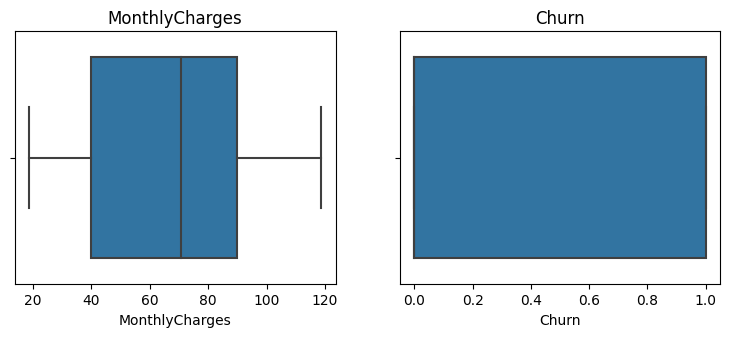

In [74]:
# Cek outliers

col_names = df.drop(columns=['tenure']).describe().columns

plot_number = 1

plt.figure(figsize=(24,19))
for kolom in col_names:
    plt.subplot(5,5, plot_number)
    sns.boxplot(data=df, x=kolom)
    plt.title(kolom)

    plot_number +=1

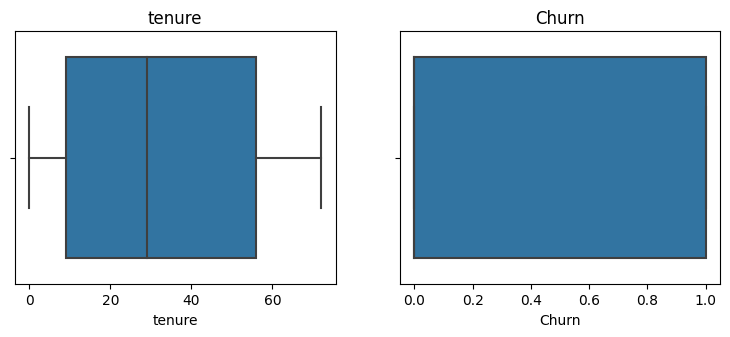

In [75]:
col_names = df.drop(columns=['MonthlyCharges']).describe().columns

plot_number = 1

plt.figure(figsize=(24,19))
for kolom in col_names:
    plt.subplot(5,5, plot_number)
    sns.boxplot(data=df, x=kolom)
    plt.title(kolom)

    plot_number +=1

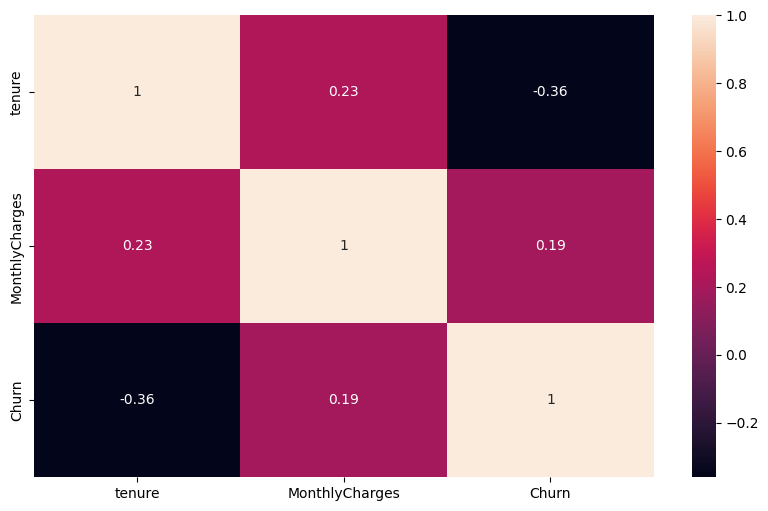

In [76]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True);

## `Preprocessing`

Encode:
- Ordinal Encoder:
    - Contract	
    - 'InternetService'
- One Hot Encoder:
    - 'Dependent'
    - 'OnlineSecurity'
    - 'OnlineBackup'
    - 'InternetService'
    - 'DeviceProtection'
    - 'TechSupport'
    -

Scaler:
- MinMax
- Standard
- Robust

Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki.
Yang akan kita lakukan adalah :

1. Merubah fitur/kolom `Contract` menjadi integer 0-2 dengan Ordinal Encoding, karena fitur ini adalah lama kontrak berlangganan Telco.
2.  Merubah fitur/kolom `InternetService` menjadi integer 0-2 dengan Ordinal Encoding, karena fitur ini adalah level berlangganan internet degan Telco
3. Merubah fitur/kolom `Dependents` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
4. Merubah fitur/kolom `OnlineSecurity` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
5. Merubah fitur/kolom `OnlineBackup` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
6. Merubah fitur/kolom `DeviceProtection` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
8. Merubah fitur/kolom `TechSupport` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
9. Merubah fitur/kolom `PaperlessBilling` menggunakan One Hot Encoding, karena fitur ini walaupun memiliki urutan/ordinal,

Yang kita scaling adalah:
1. `MonthlyCharges`
2. `Tenure`

In [77]:
# mapping untuk ordinal encoder

ordinal_mapping = [
    {'col':'InternetService', 'mapping':{None:0, 'Fiber optic':3, 'DSL':2, 'No':1}},
    {'col':'Contract', 'mapping':{None:0, 'Month-to-month':3, 'One year':2, 'Two year':1}}
]

In [78]:
transformer = ColumnTransformer([
    ('scaling', MinMaxScaler(), ['tenure','MonthlyCharges']),
    ('one_hot_encoder', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
    ('ordinal', ce.OrdinalEncoder(cols=['InternetService', 'Contract'], mapping=ordinal_mapping), ['InternetService', 'Contract']),
], remainder='passthrough')

In [79]:
scaler=MinMaxScaler()

# **`Define X y`**

In [80]:
# Separate between X and y features
X=df.drop(columns='Churn')
y=df['Churn']

In [81]:
# Ratio 80 : 20
# Normal Dataset
X_train,X_test,y_train,y_test=train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

In [82]:
resample = SMOTENC(random_state=0, categorical_features=[0, 2, 3, 4, 5, 6, 7, 8])

In [83]:
# resampling
smote = SMOTE(random_state=0)
nearmiss = NearMiss()
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# **`MODELING`**

In [84]:
logreg = LogisticRegression(random_state=0, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced')
rf = RandomForestClassifier(random_state=0, class_weight='balanced')
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')
cat = CatBoostClassifier(verbose=False,random_state=0)

# **`Modeling Benchmark`**

In [85]:
# Define imbalanced treatment method
models = [logreg, knn, tree, rf, ada, gbc, xgbc,cat]
score = []
nilai_mean = []
nilai_std = []

# F2 score (Karena cost dari FN (diprediksi tidak churn, padahal aslinya churn) lebih tinggi dari pada FP (diprediksi churn, padahal aslinya tidak churn))
f2_score = make_scorer(fbeta_score, beta=2)

for i in models:

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('resampler', ros),
        ('scaler',scaler),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring=f2_score,
        error_score='raise'
    )

    # print(model_cv, i)

    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

In [86]:
df_cv = pd.DataFrame({
    'model': ['logreg', 'knn', 'tree', 'rf', ' ada', 'gbc', 'xgbc','cat'],
    'mean': nilai_mean,
    'std': nilai_std
}).sort_values(by=['mean','std'],ascending=[False,True])

df_cv 

,model,mean,std
0,logreg,0.708280,0.014271
5,gbc,0.700173,0.019183
7,cat,0.682863,0.026480
1,knn,0.633126,0.025535
6,xgbc,0.614955,0.026041
3,rf,0.550564,0.009368
4,ada,0.514764,0.033835
2,tree,0.505486,0.016155


Logistic Regression

- Pros: Mudah digunakan dan diinterpretasikan, waktu training cepat, tidak membutuhkan asumsi distribusi kelas, akurasi yang baik untuk dataset yang sederhana, cenderung tidak over-fitting tetapi bisa over-fitting dalam dataset dimensi tinggi. kita dapat mempertimbangkan teknik Regularisasi (L1 dan L2) untuk menghindari over-fitting dalam skenario ini.
- Cons: tidak bisa digunakan untuk masalah non-linear, tidak boleh ada multi-collinearitas antar variabel independent.

Terlihat bahwa model Logistic Regression, AdaBoost dan GradientBoost memiliki hasil yang cukup stabil baik pada train set, validation maupun test set.

## **`Hyperparameter Tuning Gradient Boost`**

In [87]:
max_depth = list(np.arange(1, 50))               # kedalaman pohon
learning_rate = list(np.arange(1, 200)/100)      # learning rate
n_estimators = list(np.arange(50, 500))          # jumlah pohon
# jumlah baris train set tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)
# jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_features = list(np.arange(1, 10))

# Hyperparameter space GBC
hyperparam_space_gbc = { 
    'resampler': [smote, rus, ros, None],
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__max_features': max_features
}

# Benchmark model 1
gbc = GradientBoostingClassifier(random_state=0,)

# Create the algorithm chains
estimator_gbc = Pipeline([
    ('tansformer', transformer),
    ('resampler', rus),
    ('scaler',scaler),
    ('model', gbc)
])

# Hyperparameter tuning
random_gbc = RandomizedSearchCV(
 estimator_gbc,
 param_distributions=hyperparam_space_gbc,
 cv=5,
 scoring=f2_score,
 n_jobs=-1,
 random_state=0,
 n_iter=500
)



In [88]:
random_gbc.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
pd.DataFrame(random_gbc.cv_results_).sort_values(by='rank_test_score').head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
260,1.952784,0.128186,0.042813,0.005038,SMOTE(random_state=0),0.2,279,8,2,0.01,"{'resampler': SMOTE(random_state=0), 'model__subsample': 0.2, 'model__n_estimators': 279, 'model__max_features': 8, 'model__max_depth': 2, 'model__learning_rate': 0.01}",0.709312,0.738055,0.701220,0.736704,0.736301,0.724318,0.015776,1
467,0.813089,0.026348,0.031703,0.006774,RandomOverSampler(random_state=0),0.8,124,2,3,0.12,"{'resampler': RandomOverSampler(random_state=0), 'model__subsample': 0.8, 'model__n_estimators': 124, 'model__max_features': 2, 'model__max_depth': 3, 'model__learning_rate': 0.12}",0.699301,0.726719,0.702988,0.723104,0.724382,0.715299,0.011673,2
0,0.947510,0.025787,0.036767,0.004508,SMOTE(random_state=0),0.5,137,7,1,0.34,"{'resampler': SMOTE(random_state=0), 'model__subsample': 0.5, 'model__n_estimators': 137, 'model__max_features': 7, 'model__max_depth': 1, 'model__learning_rate': 0.34}",0.675795,0.729800,0.713660,0.727029,0.721878,0.713633,0.019700,3
98,0.908733,0.041804,0.034750,0.003060,RandomOverSampler(random_state=0),0.6,93,3,4,0.07,"{'resampler': RandomOverSampler(random_state=0), 'model__subsample': 0.6, 'model__n_estimators': 93, 'model__max_features': 3, 'model__max_depth': 4, 'model__learning_rate': 0.07}",0.694076,0.706140,0.693950,0.720000,0.721925,0.707218,0.012080,4
59,0.493357,0.019450,0.031586,0.002322,SMOTE(random_state=0),0.3,72,8,1,0.7,"{'resampler': SMOTE(random_state=0), 'model__subsample': 0.3, 'model__n_estimators': 72, 'model__max_features': 8, 'model__max_depth': 1, 'model__learning_rate': 0.7}",0.670786,0.729077,0.709849,0.726534,0.691347,0.705519,0.022012,5


In [ ]:
random_gbc.best_score_

0.7243184763106816

In [ ]:
random_gbc.best_params_

{'resampler': SMOTE(random_state=0),
 'model__subsample': 0.2,
 'model__n_estimators': 279,
 'model__max_features': 8,
 'model__max_depth': 2,
 'model__learning_rate': 0.01}

## **`Hyperparameter Tuning Gradient Boost Tuning ke 2`**

In [89]:
max_depth = list(np.arange(0,3))               # kedalaman pohon
learning_rate = list(np.arange(1, 50)/100)      # learning rate
n_estimators = list(np.arange(50, 53))          # jumlah pohon
# jumlah baris train set tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 5)/10)
# jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_features = list(np.arange(1, 3))

# Hyperparameter space GBC
hyperparam_space_gbc = { 
    'resampler': [smote, rus, ros, None],
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__max_features': max_features
}

# Benchmark model 1
gbc = GradientBoostingClassifier(random_state=0,)

# Create the algorithm chains
estimator_gbc = Pipeline([
    ('tansformer', transformer),
    ('resampler', rus),
    ('scaler',scaler),
    ('model', gbc)
])

# Hyperparameter tuning
random_gbc = RandomizedSearchCV(
 estimator_gbc,
 param_distributions=hyperparam_space_gbc,
 cv=5,
 scoring=f2_score,
 n_jobs=-1,
 random_state=0,
 n_iter=500
)



In [90]:
random_gbc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
random_gbc.best_score_

0.7366484273552338

Setelah melakukan Tunning GradientBoost ke 2 kita baru mendapatkan hasil yang lebih maksimal best score meningkat dari 0,708 menjadi 0,730

# **`Hyper Tuning Logistic Regresor`**

## Check Multicollinearity

In [91]:
df_dummy = pd.get_dummies(dfa, drop_first=True)
df_dummy.head()

,tenure,MonthlyCharges,Dependents_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,Churn_Yes
0,9,72.90,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1
1,14,82.65,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0
2,64,47.85,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1
3,72,69.65,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
4,3,23.60,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0


In [92]:
dfa.corr()

,tenure,MonthlyCharges
tenure,1.000000,0.240244
MonthlyCharges,0.240244,1.000000


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
df_dummy

,tenure,MonthlyCharges,Dependents_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,Churn_Yes
0,9,72.90,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1
1,14,82.65,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0
2,64,47.85,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1
3,72,69.65,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
4,3,23.60,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,15,103.45,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
4926,10,91.10,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0
4927,58,20.75,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0
4928,1,69.75,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1


In [95]:
# Function to calculate VIF
def calc_vif(X):

    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 10, 'Yes', 'No') 
    
    return(vif)

In [96]:
feature = df_dummy.drop(columns=['Churn']).columns.to_list()
feature

KeyError: "['Churn'] not found in axis"

In [ ]:
calc_vif(df_dummy[feature])

NameError: name 'calc_vif' is not defined

In [ ]:
df_dummy[feature].corr()

NameError: name 'feature' is not defined

# **`Define X dan y untuk Logistic Regresion`**

In [97]:
Xlog=dfa.drop(columns=['Churn','MonthlyCharges'])
ylog=dfa['Churn']

In [98]:
# Ratio 80 : 20
# Normal Dataset
Xlog_train,Xlog_test,ylog_train,ylog_test=train_test_split(
    Xlog, 
    ylog,
    test_size=0.2,
    random_state=0,
    stratify=ylog
)

In [99]:
# mapping untuk ordinal encoder

ordinal_mappinglog = [
    {'col':'InternetService', 'mapping':{None:0, 'Fiber optic':3, 'DSL':2, 'No':1}},
    {'col':'Contract', 'mapping':{None:0, 'Month-to-month':3, 'One year':2, 'Two year':1}}
]

In [100]:
transformerlog = ColumnTransformer([
    ('scaling', MinMaxScaler(), ['tenure']),
    ('one_hot_encoder', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
    ('ordinal', ce.OrdinalEncoder(cols=['InternetService', 'Contract'], mapping=ordinal_mappinglog), ['InternetService', 'Contract']),
], remainder='passthrough')

# **`Hyper Tuning Logistic Regresion`**

In [101]:
# Checking time computing
lr_estimator = Pipeline([
    ('transformer', transformerlog),
    ('model', logreg)])

hyperparam_space_logreg = {
    'model__C': [ 1],
    'model__solver': ['newton-cg'],
    'model__class_weight': ['balanced'],
    'model__max_iter': [100],
    'model__multi_class': ['auto'],
    'model__random_state': [2022]
}

grid_logreg= GridSearchCV(
                lr_estimator,
                param_grid = hyperparam_space_logreg,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_jobs = -1)



In [102]:
grid_logreg.fit(Xlog_train, ylog_train)



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling',
                                                                         MinMaxScaler(),
                                                                         ['tenure']),
                                                                        ('one_hot_encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBil...
Month-to-month    3
One year          2
Two year          1
dtype: int64}]),
                                                                         ['InternetService',
                                                                          'Contract'])])),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [1], 'model__class_weight': ['balanced'],
                         'model__max_iter': [100],
                         'model__multi_class': ['auto'],
                         'model__random_state': [2022],
                         'model__solver': ['newton-cg']},
             scoring='recall')

In [103]:
print('best score', grid_logreg.best_score_)
print('best param', grid_logreg.best_params_)

best score nan
best param {'model__C': 1, 'model__class_weight': 'balanced', 'model__max_iter': 100, 'model__multi_class': 'auto', 'model__random_state': 2022, 'model__solver': 'newton-cg'}


f2 score di train set:
- benchmark model gradient boost:               0.700054
- hyperparameter tuning gradient boost:         0.730980
- benchmark model LogisticRegression:           0.708280
- hyperparamater tuning LogisticRegression:     0.793203


## **Performance in Test Set**

### Before Hyperparameter Tuning

In [110]:
models = {
    'LogisticRegresion': LogisticRegression(random_state=0),
    'GradientBoosting': GradientBoostingClassifier(random_state=0)
}

score = []

for i in models:

    model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote),
        ('model', models[i])
    ])

    # fitting
    model.fit(X_train, y_train)

    # predict
    y_pred = model.predict(X_test)

    # recall score
    score.append([fbeta_score(y_test, y_pred, beta=2)])

score_before_tuning = pd.DataFrame(
    score, columns=['F2 score'], index=models.keys())
score_before_tuning

,F2 score
LogisticRegresion,0.729825
GradientBoosting,0.722978


### After Hyperparameter Tuning

In [113]:
 # best model
logreg_tuning = grid_logreg.best_estimator_


# fitting
logreg_tuning.fit(X_train, y_train)

# # predict
y_pred_logreg_tuning = logreg_tuning.predict(X_test)

# # recall score
f2score_logreg_tuning = fbeta_score(y_test, y_pred_logreg_tuning, beta=2)
f2score_logreg_tuning


0.7367318435754189

In [114]:
pd.DataFrame(logreg_tuning[1].coef_.flatten())

,0
0,-2.090237
1,-0.331456
2,-0.386983
3,-0.283080
4,0.084953
5,-0.406976
6,0.375796
7,0.473964
8,0.830781
9,0.016396


In [116]:
# best model
gbc_tuning = random_gbc.best_estimator_

# fitting
gbc_tuning.fit(X_train, y_train)

# predict
y_pred_gbc_tuning = gbc_tuning.predict(X_test)

# recall score
f2score_gbc_tuning = fbeta_score(y_test, y_pred_gbc_tuning, beta=2)
f2score_gbc_tuning

In [ ]:
score_list = [f2score_logreg_tuning,f2score_gbc_tuning]

models = ['LogisticRegression','GradientBoosting']

score_after_tuning = pd.DataFrame({
    'Model': models,
    'F2 score': score_list
 })

score_after_tuning


,Model,F2 score
0,LogisticRegression,0.736732
1,GradientBoosting,0.752183


# `Confusion Matrix`

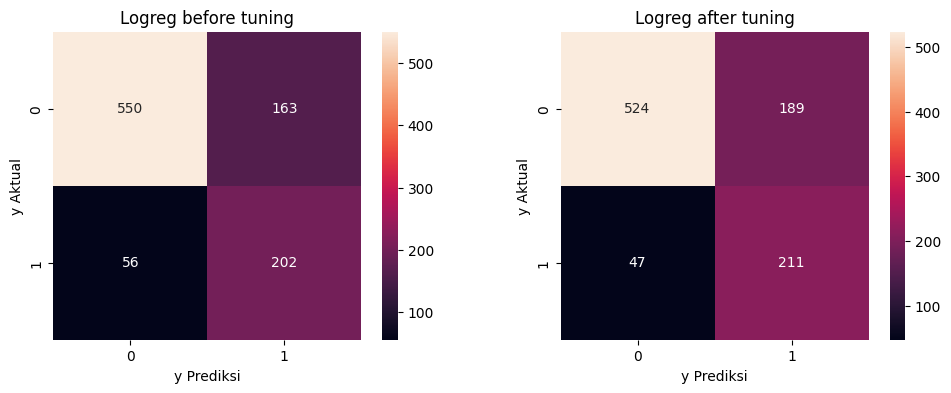

In [ ]:
plt.figure(figsize=(12,4))

# Model LogregBoost before tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Logreg before tuning')

# Model LogregBoost after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Logreg after tuning');

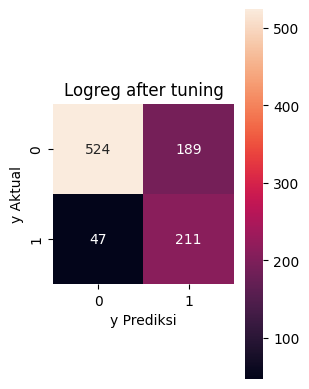

In [ ]:
# Model Logreg after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_gbc_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Logreg after tuning');

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model `logistic regresion` yang telah kita buat didapati:

- Jumlah pelanggan yang aktualnya churn dan diprediksi akan churn (True Positive) : 211 orang
- Jumlah pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn (False Negative) : 189 orang
- Jumlah pelanggan yang aktualnya tidak churn dan diprediksi tidak akan churn (True Negative) : 524 orang
- Jumlah pelanggan yang aktualnya tidak churn tetapi diprediksi akan churn (False Positive) : 47 orang
- Jumlah pelanggan yang diprediksi akan churn sebanyak 189 + 211 = 400 orang
- Jumlah pelanggan yang diprediksi tidak akan churn sebanyak 524 + 47 = 571 orang

In [ ]:
# mengecek hasil prediksi berdasarkan Contract
df_check = X_test.copy()
df_check['Prediction'] = y_pred_gbc_tuning

df_check.pivot_table(
    index = 'Contract',
    columns = 'Prediction',
    values = 'MonthlyCharges',
    aggfunc=len
).fillna(0)

Prediction,0,1
Contract,,
Month-to-month,59.0,457.0
One year,218.0,0.0
Two year,237.0,0.0


Kita juga bisa melihat bahwa jumlah pelanggan yang diprediksi akan churn sebesar 456 orang tersebut semuanya berasal dari Contract Month-to-month. Hal ini konsisten dengan penjelasan pada plot tree sebelumnya dimana secara umum model tersebut mengklasifikasikan pelanggan berdasarkan kontraknya dimana pelanggan dengan Contract 'Month-to-Month' diklasifikasikan sebagai Churn, sedangkan pelanggan dengan Contract Two year atau One Year diklasifikasikan sebagai Not Churn

# **`Feature importance`**

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
a=transformer.fit(X_train).transformers_[0][2]
b=transformer.fit(X_train).transformers_[1][2]
c=transformer.fit(X_train).transformers_[2][2]

In [119]:
d=a+b+c
d

['tenure',
 'MonthlyCharges',
 'Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'PaperlessBilling',
 'InternetService',
 'Contract']

In [120]:
e=pd.DataFrame(logreg_tuning[1].coef_.flatten())

In [121]:
e['name']=d
e

,0,name
0,-2.090237,tenure
1,-0.331456,MonthlyCharges
2,-0.386983,Dependents
3,-0.283080,OnlineSecurity
4,0.084953,OnlineBackup
5,-0.406976,DeviceProtection
6,0.375796,TechSupport
7,0.473964,PaperlessBilling
8,0.830781,InternetService
9,0.016396,Contract


Seperti yang kita lihat data frame feature importance diatas bisa kita lihat bahwa feature yang penting di atas adalah `tenure`yang mempengaruhi customer akan churn atau tidak

RECOMMENDATION

Beberapa langkah aksi yang dapat dilakukan perusahaan untuk meminimalisir jumlah pelanggan yang akan berhenti berlangganan (churn) di antaranya :

Memberikan insentif atau reward yang menarik bagi pelanggan untuk beralih dari Contract Month-to-month yang bersifat jangka pendek menjadi Contract One year atau Two year yang lebih bersifat jangka panjang.

Membuat Customer Loyalty Program yang mendorong pelanggan agar tetap bertahan dan memiliki waktu tenure yang panjang. Bentuk program bisa berupa pemberian reward yang besarannya disesuaikan dengan masa tenure. Semakin panjang tenure, semakin besar reward yang bisa didapat, sehingga mendorong pelanggan untuk memiliki tenure yang lebih panjang.

Memberikan diskon/potongan harga MonthlyCharges bagi pegawai yang terindikasi/diprediksi akan churn, khususnya untuk pelanggan yang memiliki MonthlyChargesyang tinggi.

Menyediakan layangan InternetService Fiber optic dengan harga yang lebih murah. Kita bisa lihat pada EDA bahwa MonthlyCharges rata-rata untuk Fiber optic sebesar 
58.1). 
Harga yang tinggi dari layanan tersebut bisa saja menjadi pemicu pelanggan dengan InternetService Fiber optic untuk cenderung Churn.
Secara berkala melakukan survey kepuasan pelanggan untuk mengetahui kualitas layanan yang telah diberikan dan memperbaiki jika ada reviu yang negatif.

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi diantaranya:

Menambahkan fitur-fitur atau kolom baru yang berisi tingkat kepuasan pelanggan untuk masing-masing layanan, sehingga dapat diketahui lebih lanjut apakah churn disebabkan oleh kualitas layanan yang buruk atau tidak.
Menambahkan fitur-fitur atau kolom baru yang berisi durasi atau biaya penggunaan produk-produk yang ada seperti panggilan suara, SMS, dan internet. Sehingga perusahaan dapat melakukan segmentasi pelanggan untuk menentukan jenis produk yang paling sesuai untuk ditawarkan.
Melakukan penambahan data khususnya untuk kelas minoritas (Churn) agar dapat membantu meningkatkan performa model.
Mencoba algorithm ML dan hyperparameter tuning yang berbeda (misal algoritma Logistic Regression, CatBoost, etc) serta menggunakan teknik oversampling yang berbeda selain SMOTENC.
Menganalisa data-data yang model yang masih salah tebak (False Negative dan False Positive) untuk mengetahui alasan dan karakteristiknya.